# PCA on Iris data set 
The first step is to import neccesary library and load iris dataset from sklearn. We also map the label of iris data to its name which we will use in the future.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

iris = load_iris()
x_all = iris.data
y_all = iris.target
irises_type = ['Setosa', 'Versicolour','Virginica']
y_type = [irises_type[i] for i in y_all]
y_df = pd.DataFrame(y_type, columns=['Labels'])

Next, we can perform standardization and PCA on data using sklearn.preprocessing and sklearn.decomposition as shown in the following.

In [ ]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x_all)

# Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

# Mapping data to each principal component (axis)
x_pca = pca.transform(x_std)

## Plotting Cumulative Contribition Rate
After we calculate principal components from the above code, we can plot the graph of cumulative contribution rate. We can access each contribution ratio by using pca.explained_variance_ratio_ and calculate its cumulative sum using numpy's cumsum.

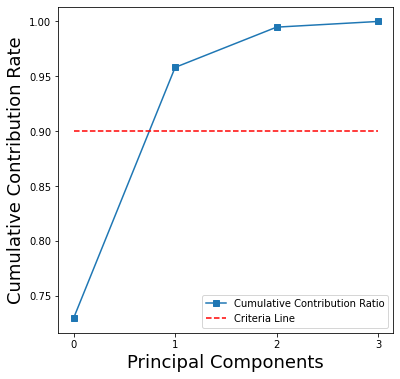

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
# plot cumulative contribution rate using np.cumsum
ax.plot(np.cumsum(pca.explained_variance_ratio_),'s-',label='Cumulative Contribution Ratio')
ax.plot([0,3],[0.9,0.9],'r--',label='Criteria Line')

# add some information to the plot
ax.set_xlabel('Principal Components', fontsize=18)
ax.set_ylabel('Cumulative Contribution Rate', fontsize=18)
ax.set_xticks([0,1,2,3])
plt.legend()

## Plotting first two components
Next, we will extract the data on the first two principal components. Then we concatanate them with the label data as shown in the code below.

In [ ]:
# extract first 2 pricipal components by choosing first two columns
reduced_dim = 2
x_pca_reduced  = x_pca[:, :reduced_dim] 

# transform data to pandas data frame
principal_df = pd.DataFrame(data = x_pca_reduced
             , columns = ['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, y_df], axis = 1)
print(final_df)

     Principal Component 1  Principal Component 2     Labels
0                -2.264703               0.480027     Setosa
1                -2.080961              -0.674134     Setosa
2                -2.364229              -0.341908     Setosa
3                -2.299384              -0.597395     Setosa
4                -2.389842               0.646835     Setosa
..                     ...                    ...        ...
145               1.870503               0.386966  Virginica
146               1.564580              -0.896687  Virginica
147               1.521170               0.269069  Virginica
148               1.372788               1.011254  Virginica
149               0.960656              -0.024332  Virginica

[150 rows x 3 columns]


Lastly, we plot the above data using principal component 1 and 2 as its x and y axis.

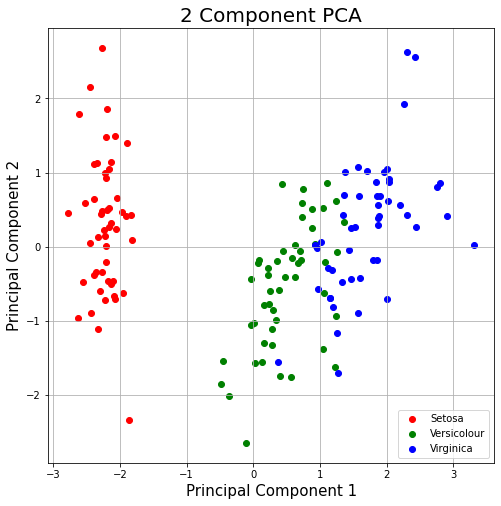

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# add some information to the plot
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Setosa', 'Versicolour','Virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Labels'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'Principal Component 1']
               , final_df.loc[indicesToKeep, 'Principal Component 2']
               , c = color)
ax.legend(targets)
ax.grid()

# K-means clustering on Iris data
First, we choose the first two axis from iris data to perform clustering. Then, we import K-means class from sklearn extracting 2,3, and 4 clusters. 

In [ ]:
from sklearn.cluster import KMeans
# extract first two axis
x_std_2 = x_std[:,:2]
# instantiate the class
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

After that, we perform K-means clustering on the data using fit_predict.

In [ ]:
# calculate the clusters
y_kmeans_2 = kmeans_2.fit_predict(x_std_2)
y_kmeans_3 = kmeans_3.fit_predict(x_std_2)
y_kmeans_4 = kmeans_4.fit_predict(x_std_2)

Finally, we can plot the result using K = 2,3, and 4 as shown in the following code.

Text(0.5, 0, 'sepal length')

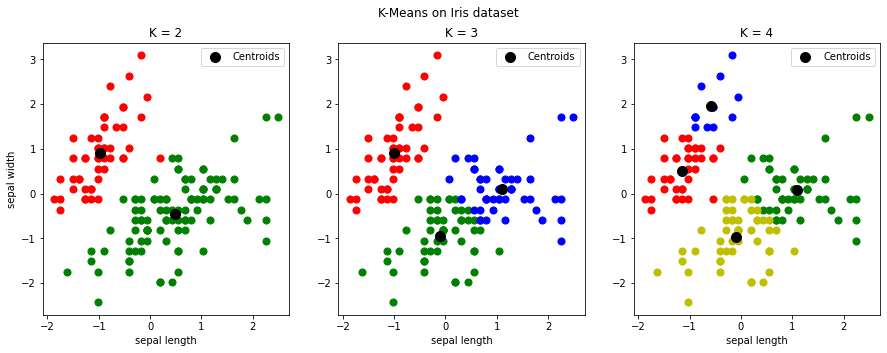

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))
fig.suptitle('K-Means on Iris dataset')
#Visualising the clusters
# K = 2
axs[0].scatter(x_std_2[y_kmeans_2 == 0, 0], x_std_2[y_kmeans_2 == 0, 1], s = 50, c = 'r')
axs[0].scatter(x_std_2[y_kmeans_2 == 1, 0], x_std_2[y_kmeans_2 == 1, 1], s = 50, c = 'g')
# K = 3
axs[1].scatter(x_std_2[y_kmeans_3 == 0, 0], x_std_2[y_kmeans_3 == 0, 1], s = 50, c = 'r')
axs[1].scatter(x_std_2[y_kmeans_3 == 1, 0], x_std_2[y_kmeans_3 == 1, 1], s = 50, c = 'g')
axs[1].scatter(x_std_2[y_kmeans_3 == 2, 0], x_std_2[y_kmeans_3 == 2, 1], s = 50, c = 'b')
# K = 4
axs[2].scatter(x_std_2[y_kmeans_4 == 0, 0], x_std_2[y_kmeans_4 == 0, 1], s = 50, c = 'r')
axs[2].scatter(x_std_2[y_kmeans_4 == 1, 0], x_std_2[y_kmeans_4 == 1, 1], s = 50, c = 'g')
axs[2].scatter(x_std_2[y_kmeans_4 == 2, 0], x_std_2[y_kmeans_4 == 2, 1], s = 50, c = 'b')
axs[2].scatter(x_std_2[y_kmeans_4 == 3, 0], x_std_2[y_kmeans_4 == 3, 1], s = 50, c = 'y')
#Plotting the centroids of the clusters
axs[0].scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
axs[1].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
axs[2].scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

axs[0].legend()
axs[0].title.set_text('K = 2')
axs[0].set_xlabel('sepal length')
axs[0].set_ylabel('sepal width')
axs[1].legend()
axs[1].title.set_text('K = 3')
axs[1].set_xlabel('sepal length')
axs[2].legend()
axs[2].title.set_text('K = 4')
axs[2].set_xlabel('sepal length')